# Exploring Dandiset 000617: Sequence Learning in Mouse Visual Cortex

**Note**: This notebook was generated with AI assistance. Please verify all code and results independently.

## Overview
This notebook explores [Dandiset 000617](https://dandiarchive.org/dandiset/000617/0.250311.1615), which investigates sequence learning in mouse visual cortex using two-photon calcium imaging. The experiment examines how neural responses in different visual areas change as mice learn temporal sequences of natural movie clips.

The experiment design involves:
- Head-fixed mice passively viewing sequences of 2-second natural movie clips (A, B, C)
- Initial random presentation (Day 0)
- Three training sessions with repeating sequences (ABCABC...)
- Final random presentation (Day 4)
- Simultaneous recording from multiple visual areas (V1, LM, AM, PM) and layers (L2/3, L4)

This notebook demonstrates:
1. Loading data using the DANDI API
2. Accessing calcium imaging traces and ROI information
3. Examining eye tracking and running speed data
4. Visualizing stimulus presentations
5. Exploring motion correction data

## Required Packages

In [1]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
from dandi.dandiapi import DandiAPIClient
import pandas as pd

## Loading Data from DANDI

In [2]:
# Initialize DANDI API client
client = DandiAPIClient()
dandiset = client.get_dandiset("000617", "0.250311.1615")

# Get a specific NWB file
asset_path = "sub-684475/sub-684475_ses-1294084428-acq-1294179945-raw-movies_ophys.nwb"
url = next(dandiset.get_assets_by_glob(asset_path)).download_url

# Load the NWB file
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.3.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Exploring Neural Activity Data

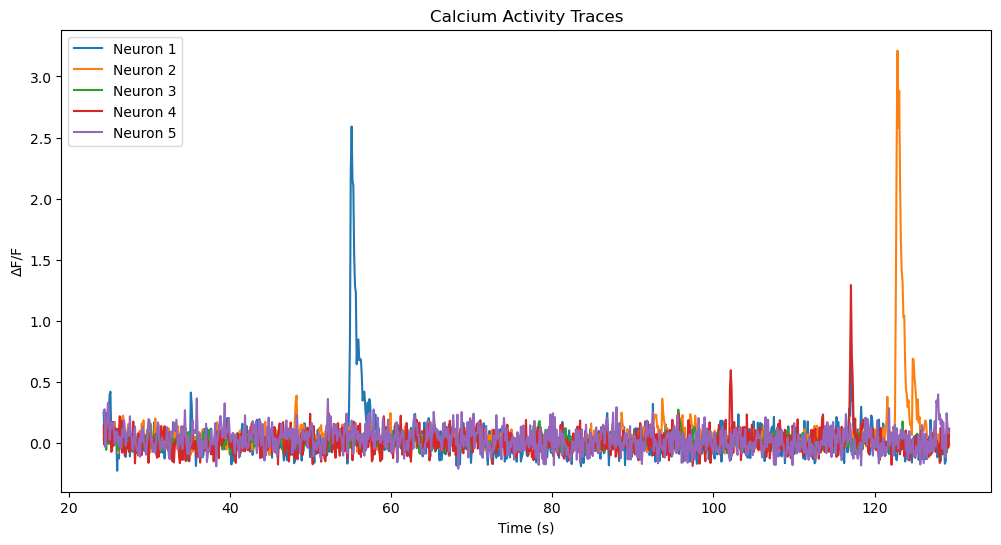

In [3]:
# Access DFF (ΔF/F) traces from the correct path
dff_data = nwb.processing['ophys']['dff'].roi_response_series['traces'].data
timestamps = nwb.processing['ophys']['dff'].roi_response_series['traces'].timestamps

# Plot DFF traces for first few neurons
plt.figure(figsize=(12, 6))
for i in range(min(5, dff_data.shape[1])):
    plt.plot(timestamps[:1000], dff_data[:1000, i], label=f'Neuron {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('ΔF/F')
plt.title('Calcium Activity Traces')
plt.legend()
plt.show()

## Analyzing Running Behavior

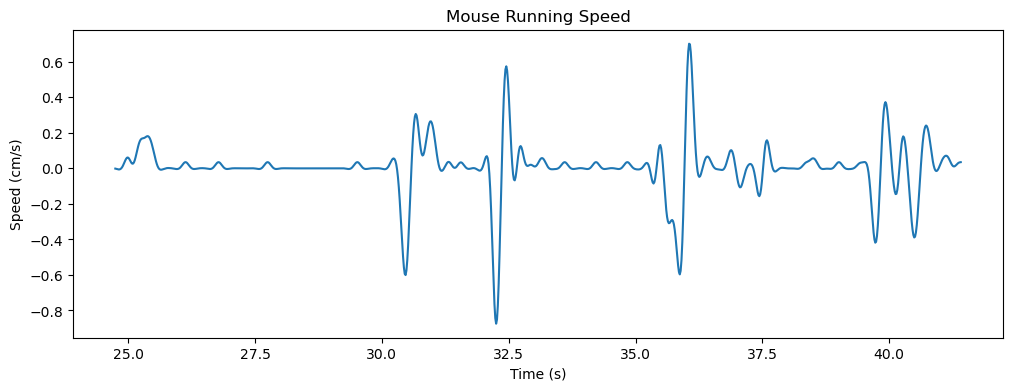

In [4]:
# Get running speed data
speed = nwb.processing['running']['speed'].data
speed_timestamps = nwb.processing['running']['speed'].timestamps

# Plot running speed
plt.figure(figsize=(12, 4))
plt.plot(speed_timestamps[:1000], speed[:1000])
plt.xlabel('Time (s)')
plt.ylabel('Speed (cm/s)')
plt.title('Mouse Running Speed')
plt.show()

## Eye Tracking Analysis

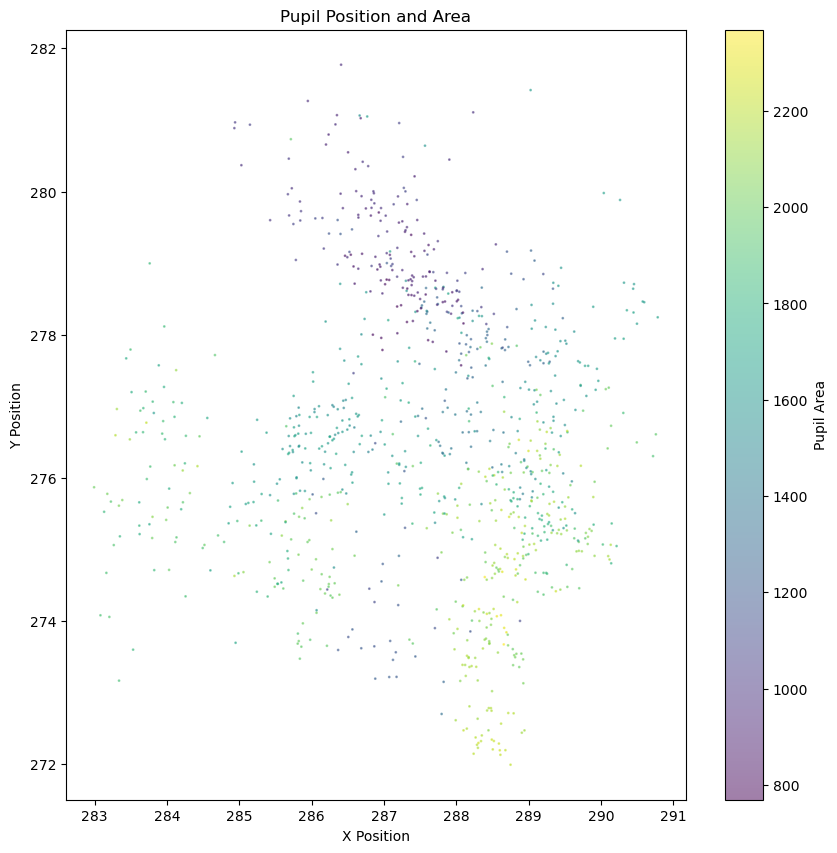

In [5]:
# Get pupil tracking data
pupil_x = nwb.acquisition['EyeTracking'].pupil_tracking.data[:, 0]
pupil_y = nwb.acquisition['EyeTracking'].pupil_tracking.data[:, 1]
pupil_area = nwb.acquisition['EyeTracking'].pupil_tracking.area

# Create scatter plot of pupil position
plt.figure(figsize=(10, 10))
plt.scatter(pupil_x[:1000], pupil_y[:1000], c=pupil_area[:1000], 
            cmap='viridis', alpha=0.5, s=1)
plt.colorbar(label='Pupil Area')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Pupil Position and Area')
plt.show()

## Stimulus Presentation Analysis

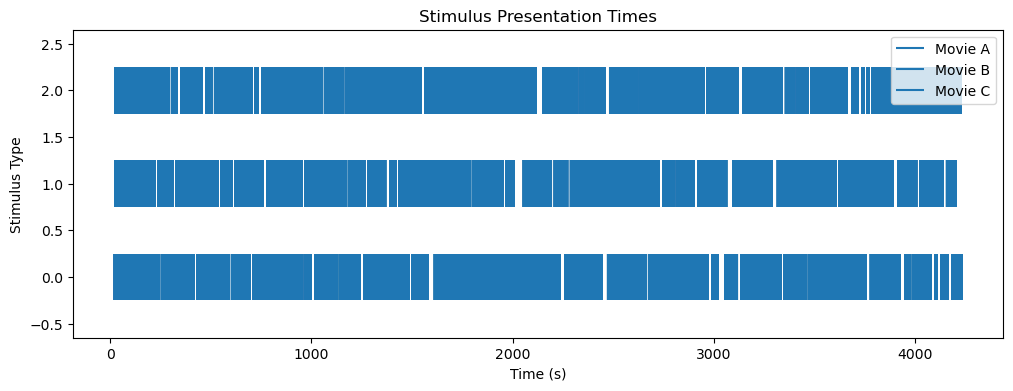

In [6]:
# Convert stimulus presentations to pandas DataFrames
movie_A_df = nwb.intervals['movie_clip_A_presentations'].to_dataframe()
movie_B_df = nwb.intervals['movie_clip_B_presentations'].to_dataframe()
movie_C_df = nwb.intervals['movie_clip_C_presentations'].to_dataframe()

# Plot stimulus presentation times
plt.figure(figsize=(12, 4))
for i, (df, label) in enumerate([
    (movie_A_df, 'Movie A'),
    (movie_B_df, 'Movie B'),
    (movie_C_df, 'Movie C')
]):
    plt.eventplot(df['start_time'], lineoffsets=i, linelengths=0.5, 
                 label=label)
plt.xlabel('Time (s)')
plt.ylabel('Stimulus Type')
plt.title('Stimulus Presentation Times')
plt.legend()
plt.show()

## Motion Correction Analysis

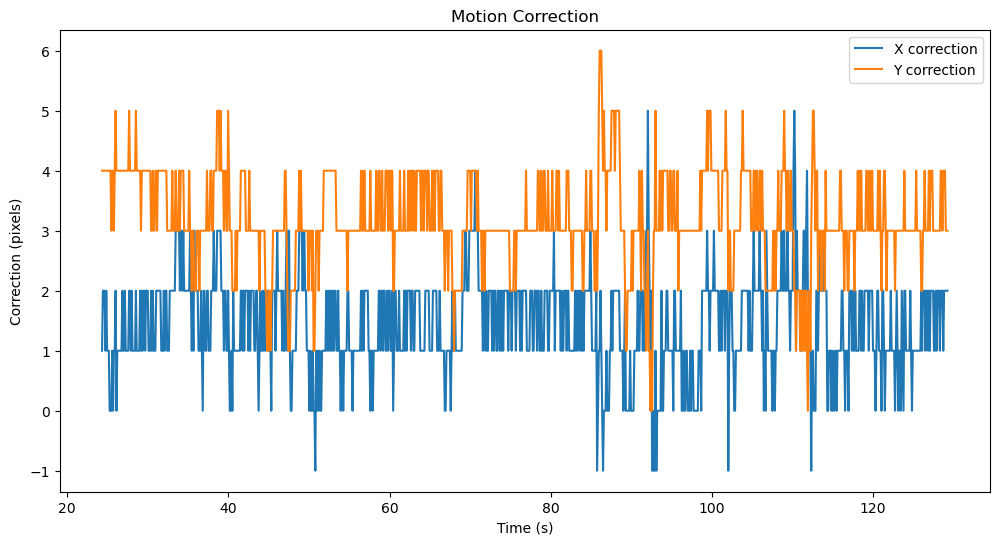

In [7]:
# Get motion correction data
motion_x = nwb.processing['ophys']['ophys_motion_correction_x'].data
motion_y = nwb.processing['ophys']['ophys_motion_correction_y'].data
motion_timestamps = nwb.processing['ophys']['ophys_motion_correction_x'].timestamps

# Plot motion correction
plt.figure(figsize=(12, 6))
plt.plot(motion_timestamps[:1000], motion_x[:1000], label='X correction')
plt.plot(motion_timestamps[:1000], motion_y[:1000], label='Y correction')
plt.xlabel('Time (s)')
plt.ylabel('Correction (pixels)')
plt.title('Motion Correction')
plt.legend()
plt.show()

## Next Steps

This dataset enables various analyses:
- Comparing neural responses between random and sequential presentations
- Investigating predictive coding across visual areas
- Examining relationships between running behavior and neural activity
- Studying eye movements during sequence learning

The NWB files contain additional data not explored here, including:
- ROI masks and cell classification
- Neuropil fluorescence
- Event detection results
- Multiple imaging planes